# **EMAIL-SPAM-DETECTION WITH MACHINE LEARNING**

---



Weve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.

In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. Let's get started!

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import nltk #(natural language tool-kit)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
import seaborn as sea
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Upload Dataset**

In [ ]:
data_set=pd.read_csv('spam.csv',encoding='latin1')

**Top 5 rows of dataset**

In [ ]:
data_set.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Random 10 rows**

In [ ]:
data_set.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2590,ham,Lol I have to take it. member how I said my au...,NaN,NaN,NaN
4512,spam,Money i have won wining number 946 wot do i do...,NaN,NaN,NaN
4764,ham,if you text on your way to cup stop that shoul...,NaN,NaN,NaN
3230,ham,No plm i will come da. On the way.,NaN,NaN,NaN
2450,ham,K..give back my thanks.,NaN,NaN,NaN
1392,ham,"Thk shld b can... Ya, i wana go 4 lessons... H...",NaN,NaN,NaN
3865,ham,"Theoretically yeah, he could be able to come",NaN,NaN,NaN
3900,ham,That depends. How would you like to be treated...,NaN,NaN,NaN
3382,ham,K... Must book a not huh? so going for yoga ba...,NaN,NaN,NaN
2422,ham,A bloo bloo bloo I'll miss the first bowl,NaN,NaN,NaN


**Total rows and columns in dataset**

In [ ]:
data_set.shape

(5572, 5)

In [ ]:
print("Total Rows =",data_set.shape[0])
print("Total Columns =",data_set.shape[1])

Total Rows = 5572
Total Columns = 5


**Columns in dataset**

In [ ]:
data_set.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

## **DATA CLEANING**

*Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.*

**Renaming cols**

In [ ]:
#Renaming the columns for better understanding

data_set.rename(columns={'v1':'Variety' , 'v2':'Data'}, inplace=True)

#Renaming columns permanently so "inplace=True"
data_set.head()

,Variety,Data,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Labelling in dataset**

`Variety values either showing 'ham' or "spam" , lets martk them with 0 and 1 respectively`

In [ ]:
encoder = LabelEncoder()
data_set['Variety'] = encoder.fit_transform(data_set['Variety']) #allotting 0,1
data_set.head()

,Variety,Data,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Dataset information**

In [ ]:
#checking the use of extra columns like - Unnamed:2 , Unnamed: 3 , Unnamed: 4
print('\033[1m' + 'Information of dataset:' + '\033[0m\n\n')
data_set.info() 

Information of dataset:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Variety     5572 non-null   int64 
 1   Data        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: int64(1), object(4)
memory usage: 217.8+ KB


**Dropping extra cols**

In [ ]:
#from above info we can see that last 3 columns Unnamed:2 , Unnamed: 3 , Unnamed: 4 has a good amount of 
#null values , so drop those columns 

data_set.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'],inplace = True)

#dropping columns permanently so "inplace=True"
data_set.head() #check dataset again after dropping

,Variety,Data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**check duplicate data in dataset**

In [ ]:
print("Total Duplicated values =",data_set.duplicated().sum())

Total Duplicated values = 403


**Delete Duplicates**

In [ ]:
data_set = data_set.drop_duplicates(keep='first') 
#Except keeping only first value delete every other matching to that particular value

**Check NULL values in dataset**

In [ ]:
print("Total NULL values =\n\n",data_set.isnull().sum())

Total NULL values =

 Variety    0
Data       0
dtype: int64


**Size of dataset**

In [ ]:
#The size property returns the number of elements in the DataFrame. 
#The number of elements is the number of rows * the number of columns.
print("Size of dataset is: ",data_set.size)

Size of dataset is:  10338


In [ ]:
data_set.sample(6)

,Variety,Data
1639,1,FreeMsg:Feelin kinda lnly hope u like 2 keep m...
2924,0,Are you coming to day for class.
2750,0,Ok but tell me half an hr b4 u come i need 2 p...
410,0,Come by our room at some point so we can iron ...
4394,0,"Only just got this message, not ignoring you. ..."
4531,0,Ok both our days. So what are you making for d...


**After Data Cleaning**

In [ ]:
print("After DATA CLEANING : \n")
print("Total Rows :",data_set.shape[0],"\n Total columns :",data_set.shape[1])

After DATA CLEANING : 

Total Rows : 5169 
 Total columns : 2


## **EXPLORATORY DATA ANALYSIS (EDA)**

*Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.*

**Count spam(1) and non-spam(0) mails**

In [ ]:
data_set['Variety'].value_counts()

0    4516
1     653
Name: Variety, dtype: int64

In [ ]:
#For tokenize the words , need to dowload the 'punkt' module
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Words in each text**

In [ ]:
data_set['words'] = data_set['Data'].apply(lambda x:len(nltk.word_tokenize(x))) #word_tokenize is breaking according to words
data_set.sample(8)

,Variety,Data,words
316,0,Hmmm... Guess we can go 4 kb n power yoga... H...,30
2953,0,Think i might have to give it a miss. Am teach...,26
4685,0,But pls dont play in others life.,8
2428,0,She.s find. I sent you an offline message to k...,16
3397,0,It only does simple arithmetic not percentages.,8
4819,1,Check Out Choose Your Babe Videos @ sms.shsex....,10
4850,0,Gain the rights of a wife.dont demand it.i am ...,14
2003,0,S....s...india going to draw the series after ...,18


**Sentences in each mail**

In [ ]:
data_set['sentence'] = data_set['Data'].apply(lambda x:len(nltk.sent_tokenize(x))) #sent_tokenize is breaking according to words
data_set.sample(8)

,Variety,Data,words,sentence
3688,0,You still coming tonight?,5,1
1376,0,Auntie huai juan never pick up her phone,8,1
1285,0,"Just wondering, the others just took off",8,1
4805,0,Call me when u finish then i come n pick u.,12,1
2462,0,"Rose needs water, season needs change, poet ne...",25,1
4016,0,Eek that's a lot of time especially since Amer...,24,2
3514,0,I'm job profile seems like bpo..,8,1
1578,0,How to Make a girl Happy? It's not at all diff...,220,28


**Characters in each text**

In [ ]:
data_set['chars']= data_set['Data'].apply(len)
data_set.sample(8)

,Variety,Data,words,sentence,chars
4793,0,Sorry that was my uncle. I.ll keep in touch,10,2,43
781,0,"Hmmm ... I thought we said 2 hours slave, not ...",23,2,94
2952,1,"URGENT! Your mobile was awarded a å£1,500 Bonu...",23,4,120
2009,0,I can't keep going through this. It was never ...,107,5,431
2571,0,Û_ and donÛ÷t worry weÛ÷ll have finished by...,12,1,61
3419,1,"As a valued customer, I am pleased to advise y...",31,2,153
1238,0,"Dear relieved of westonzoyland, all going to p...",13,1,63
4759,0,I'm home. Doc gave me pain meds says everythin...,14,2,56


**Statistics summary of Spam mails**

In [ ]:
data_set[data_set['Variety'] == 1][['words','sentence','chars']].describe()

,words,sentence,chars
count,653.000000,653.000000,653.000000
mean,27.667688,2.967841,137.891271
std,7.008418,1.483201,30.137753
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.000000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,8.000000,224.000000


**Statistics summary of Non-Spam mails**

In [ ]:
data_set[data_set['Variety'] == 0][['words','sentence','chars']].describe()

,words,sentence,chars
count,4516.000000,4516.000000,4516.000000
mean,17.120903,1.799601,70.459256
std,13.493725,1.278465,56.358207
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,34.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,90.000000
max,220.000000,28.000000,910.000000


AS WE CAN SEE NON-SPAM MAILS HAVE LARGE NUMBER OF WORDS , CHARACTERS , SENTENCES IN COMPARE TO THE SPAM MAILS.
SO THIS IS THE DIFFERENTIATING FACTOR

### **HEAT MAP**

[Text(0.5, 1.0, 'Heatmap of Correlated values \n')]

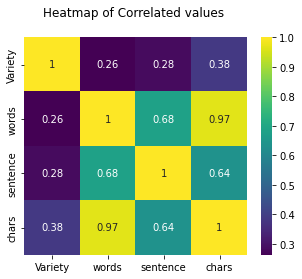

In [ ]:
#A heatmap is a matrix kind of 2-dimensional figure which gives a visualisation of numerical data in the form of cells. 
#Each cell of the heatmap is coloured and the shades of colour represent some kind of relationship of the value with 
#the dataframe.

#The correlation matrix can also be generated using Seaborn library. The cells of the generated heatmap will 
#contain the correlation coefficients but the values are round off unlike heatmap generated by Pandas library.

#here "dc" is referred as Correlation in dataset (defined above)

# Defining figure size for the output plot 
fig, ax = plt.subplots(figsize = (5, 4))
#heatmap plot :  to help us spot the strongest and weaker correlations based on warmer (reds) and cooler (blues) tones
#Use annot to represent the cell values with text
sea.heatmap(data_set.corr(), annot=True, cmap="viridis").set(title='Heatmap of Correlated values \n')

### **GRAPHICAL REPRESENTATION OF THE MAILS**

**FOR WORDS**

<Figure size 576x360 with 0 Axes>

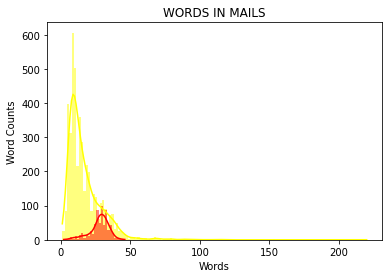

In [ ]:
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
sea.histplot(data_set[data_set['Variety'] == 0]['words'], color="yellow", kde=True, stat="count", linewidth=0,ax = ax)
sea.histplot(data_set[data_set['Variety'] == 1]['words'], color="red", kde=True, stat="count", linewidth=0 ,ax = ax)
ax.set_ylabel("Word Counts")
ax.set_xlabel( "Words")
ax.set_title( "WORDS IN MAILS") 
plt.show()

**FOR CHARACTERS**

<Figure size 576x360 with 0 Axes>

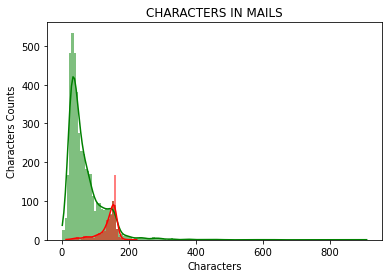

In [ ]:
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
sea.histplot(data_set[data_set['Variety'] == 0]['chars'], color="green", kde=True, stat="count", linewidth=0,ax = ax)
sea.histplot(data_set[data_set['Variety'] == 1]['chars'], color="red", kde=True, stat="count", linewidth=0,ax = ax)
ax.set_ylabel("Characters Counts")
ax.set_xlabel( "Characters")
ax.set_title( "CHARACTERS IN MAILS")
plt.show()

**FOR SENTENCES**

<Figure size 576x360 with 0 Axes>

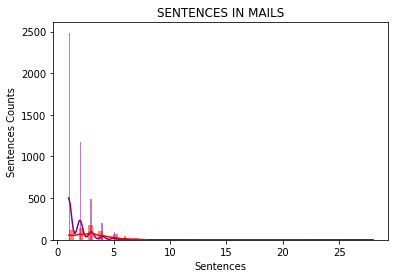

In [ ]:
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
sea.histplot(data_set[data_set['Variety'] == 0]['sentence'], color="purple", kde=True, stat="count", linewidth=0,ax = ax)
sea.histplot(data_set[data_set['Variety'] == 1]['sentence'], color="red", kde=True, stat="count", linewidth=0,ax = ax)
ax.set_ylabel("Sentences Counts")
ax.set_xlabel( "Sentences")
ax.set_title( "SENTENCES IN MAILS")
plt.show()

### **PAIRPLOT GRAPHICAL REPRESENTATION**

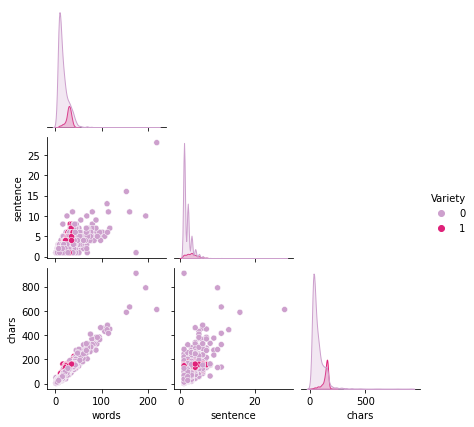

In [ ]:
#To plot multiple pairwise bivariate distributions in a dataset, you can use the .pairplot() function. 
#kernel density estimate (KDE) changes the graph from histogram
#plot_kws dictionary is used to make the regression line (kind='reg') more highlighted

sea.pairplot(data_set,hue='Variety',corner=True,height=2,palette='PuRd');

## **TEXT PRE-PROCESSING**

*Text preprocessing involves transforming text into a clean and consistent format that can then be fed into a model for further analysis and learning.*

**Looking for stopwords**

In [ ]:
nltk.download('stopwords')
stopwords.words('english')[:10] #showing first 10 stopwords of the 'enlish' as example
#they contribute in sentence formation not in sentence meaning

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

**Looking for Punctuation marks**

In [ ]:
string.punctuation #shows all available punctuation marks

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

**Stemming method**

In [ ]:
ps = PorterStemmer()
ps.stem('played') #eg : play , playing , played can be shorten to 'play'  as these all are derived from 'play'

'play'

**function for all steps of Pre-processing**

In [ ]:
def changement(a):

    #LOWER CASE
    a = a.lower()

    #TOKENIZATION
    a = nltk.word_tokenize(a)
    
    #REMOVING SPECIAL CHARACTERS
    alphanum = []
    for i in a:
        if i.isalnum():
            alphanum.append(i)
    
    a = alphanum[:]
    alphanum.clear()
    
    #DELETE ALL STOPWORDS AND PUNCTUATION
    for i in a:
        if i not in stopwords.words('english') and i not in string.punctuation:
            alphanum.append(i)
            
    a = alphanum[:]
    alphanum.clear()
    
    #STEMMING
    for i in a:
        alphanum.append(ps.stem(i))
    
            
    return " ".join(alphanum)

**Pre-processing on the particular mail as examples**

In [ ]:
changement("The only problem with a pencil, is that they do not stay sharp long enough?")

'problem pencil stay sharp long enough'

In [ ]:
changement("Last Chance! Claim ur å£150 worth of discount vouchers today! Text SHOP to 85023 now! SavaMob, offers mobile! T Cs SavaMob POBOX84, M263UZ.")

'last chanc claim ur worth discount voucher today text shop 85023 savamob offer mobil cs savamob pobox84 m263uz'

**Apply Pre-processed texts to all dataset**

In [ ]:
data_set['pre-processed'] = data_set['Data'].apply(changement)
data_set.tail(8)

,Variety,Data,words,sentence,chars,pre-processed
5564,0,Why don't you wait 'til at least wednesday to ...,16,1,67,wait least wednesday see get
5565,0,Huh y lei...,4,1,12,huh lei
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,30,1,147,remind o2 get pound free call credit detail gr...
5567,1,This is the 2nd time we have tried 2 contact u...,35,4,161,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,9,1,37,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",15,2,57,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,27,1,125,guy bitch act like interest buy someth els nex...
5571,0,Rofl. Its true to its name,7,2,26,rofl true name


**Check the dimensions again**

In [ ]:
data_set.shape

(5169, 6)

### **WORDCLOUDS ON DATASET**

**Apply Wordcloud to the NON-SPAM MAILS**

In [ ]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

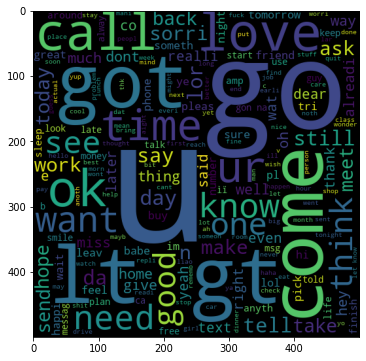

In [ ]:
non_spam = wc.generate(data_set[data_set['Variety'] == 0]['pre-processed'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(non_spam)

**Apply Wordcloud to the SPAM MAILS**

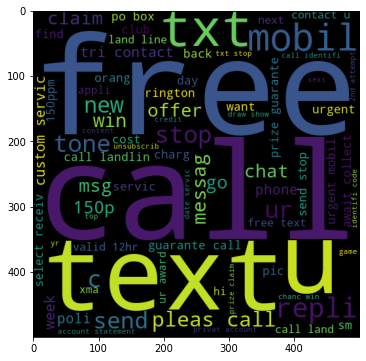

In [ ]:
spam = wc.generate(data_set[data_set['Variety'] == 1]['pre-processed'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam)

## **MODEL BUILDING**

**Assigning variable X and Y to columns**

In [ ]:
Y = data_set['Variety'].values
X = data_set['pre-processed']

In [ ]:
X.shape

(5169,)

In [ ]:
Y.shape

(5169,)

**Train-Test Split**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=9)

In [ ]:
X_train.shape

(4135,)

In [ ]:
print("Total No of Rows  :",X.shape[0])
print("Rows for training :",X_train.shape[0])
print("Rows for testing  :",X_test.shape[0])

Total No of Rows  : 5169
Rows for training : 4135
Rows for testing  : 1034


**Feature Extraction**

In [ ]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True',max_features=3000)

In [ ]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [ ]:
X_train_features.shape

(4135, 3000)

## **TRAIN THE MODEL USING LOGISTIC REGRESSION**

In [ ]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

### **Model Evaluation**

**Prediction on training data**

In [ ]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.966142684401451


**Prediction on testing data**

In [ ]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9477756286266924


**DATASET GAVING TOTAL OF SPAM AND NON-SPAM MAILS USING PIE CHART**

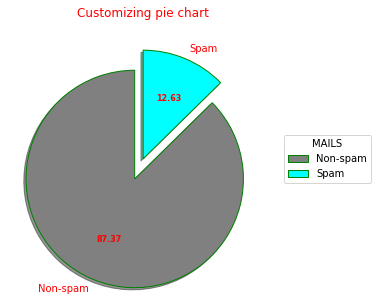

In [ ]:
fig, ax = plt.subplots(figsize =(5, 5))
#labels
m=['Non-spam','Spam']
#title for chart
ax.set_title("Customizing pie chart",color="red")
# Creating color parameters
colors = ( "grey", "cyan")
# Creating explode data
explode = (0.2, 0.0)
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
# Creating plot
wedges, texts, autotexts = ax.pie(data_set['Variety'].value_counts(),
                                  autopct = "%0.2f",
                                  explode = explode,
                                  labels = m,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="red"))
# Adding legend
ax.legend(wedges,m,
          title ="MAILS",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")

plt.show()

# ***EMAIL SPAM DETECTOR***

---



**Take User Input**

In [ ]:
user_mail = input("Enter the text of the email :\n\n")

Enter the text of the email :

07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow


In [ ]:
processed=changement(user_mail)
processed

'07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow'

**Apply Feature Extraction**

In [ ]:
input_data_features = feature_extraction.transform([processed])

#print("After Feature Extraction :\n\n",input_data_features)

**Perform Prediction Over User Input**

In [ ]:
predicted_output = model.predict(input_data_features)

#print("Predicted Output :\n\n",predicted_output)

In [ ]:
if (predicted_output[0]==1):
    print('Spam mail')
else:
    print('Non-Spam mail')

Spam mail


**Showed the "spam mail" as result**